# Abracadata Exploratory Data Analysis#< br>
Just poking around the datasets we were given...

**Brainstorming**<br>
Data to add to our analysis:

- By month or year, the amount of soybeans planted/harvested/produced (look for anything the USDA has on soybeans)
- Look up complementary products to soybeans and get this ^ same data for those goods (maybe also the commodities Hock found to be correlated w/soybean exports)<br>

Approaches for further analysis:
- Use CUSUM as a change detection method to indicate when prices are actually changing vs if a daily price change can just be considered 'noise'<br>
(for reference: https://en.wikipedia.org/wiki/CUSUM)

In [3]:
import pandas as pd
import seaborn as sns
from functools import reduce
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(18, 8)})
march_data = pd.read_csv('march2020.csv')
may_data = pd.read_csv('may2020.csv')
july_data = pd.read_csv('july2020.csv')

#making copies of each dataframe
march = march_data.copy()
may = may_data.copy()
july = july_data.copy()

#using date as index
march['Date'] = pd.to_datetime(march['Date'])
may['Date'] = pd.to_datetime(may['Date'])
july['Date'] = pd.to_datetime(july['Date'])

#removes timestamp from date/time
march['Date'] = march['Date'].dt.date
may['Date'] = may['Date'].dt.date
july['Date'] = july['Date'].dt.date

#creating a combined dataframe with one column corresponding to the open, low, high and close price for each month
dataFrames = [march, may, july]
df = reduce(lambda  left,right: pd.merge(left,right,on=['Date'], how='outer', suffixes = ('_march','_may')), dataFrames)
df.rename(columns={'Open': 'Open_july', 'High': 'High_july', 'Low':'Low_july','Close':'Close_july'}, inplace=True)

## Analyzing closing price trends##

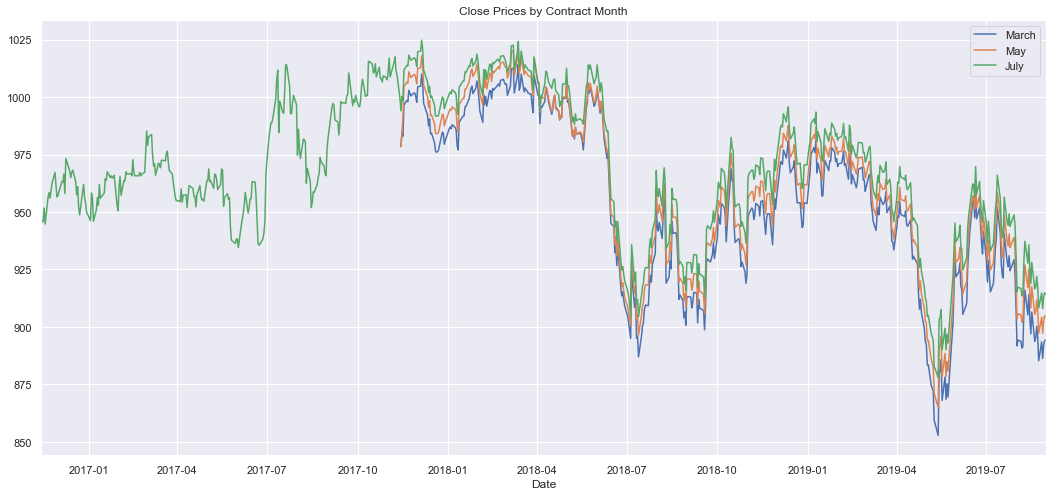

In [4]:
#plot close price by contract month
plot1 = df.plot(x='Date', y=['Close_march', 'Close_may', 'Close_july'], label = ['March','May','July'], title = 'Close Prices by Contract Month')

### Close prices are typically greatest for July contracts and smallest for March contracts

In [5]:
#find the min and max close price per contract month over the entire date range

### The min close price day is the same for all three contract months
print('Close Price Min | Max Dates:\nMARCH -  Min:{} | Max:{}'.format(df.loc[df['Close_march'].idxmin(), 'Date'], df.loc[df['Close_march'].idxmax(), 'Date']))
print('MAY -  Min:{} | Max:{}'.format(df.loc[df['Close_may'].idxmin(), 'Date'], df.loc[df['Close_may'].idxmax(), 'Date']))
print('JULY -  Min:{} | Max:{}'.format(df.loc[df['Close_july'].idxmin(), 'Date'], df.loc[df['Close_july'].idxmax(), 'Date']))

Close Price Min | Max Dates:
MARCH -  Min:2019-05-13 | Max:2018-03-13
MAY -  Min:2019-05-13 | Max:2018-03-13
JULY -  Min:2019-05-13 | Max:2017-12-05


[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c59be10>


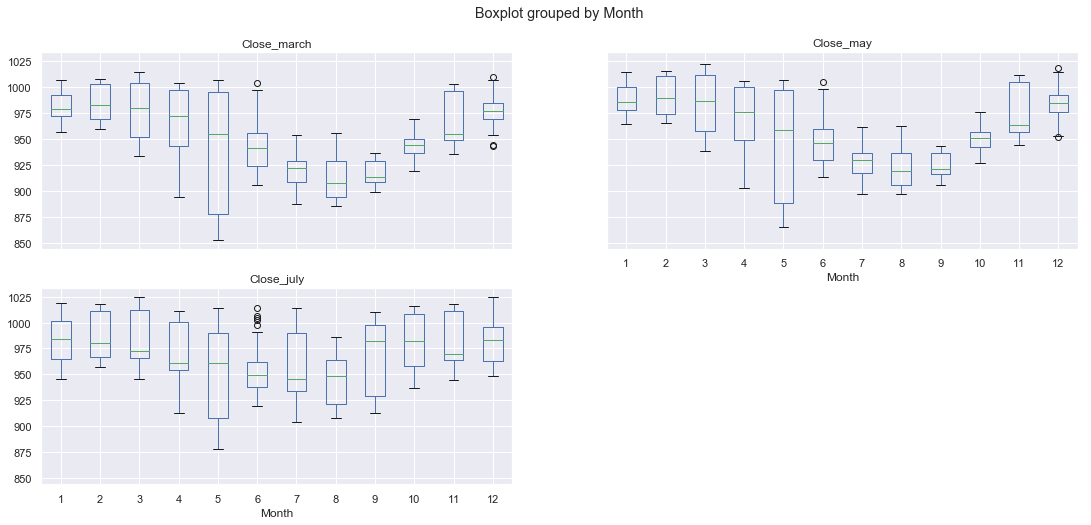

In [6]:
df['Month'] = pd.to_datetime(df['Date'])
df['Month'] = df['Month'].apply(lambda x: x.month)
boxplot = df.boxplot(column = ['Close_march','Close_may','Close_july'], by = 'Month')
print(boxplot)

### The spread is always the largest in May regardless of contract month

***
## At this point, I am going to just focus on one contract month to simplify the analysis (especially as I practice working w/time series data)##

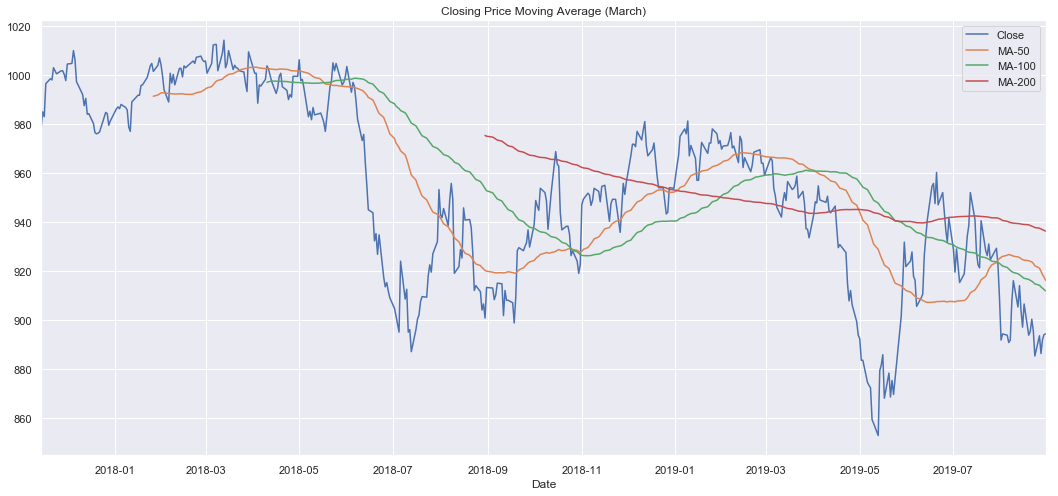

In [7]:
#create a dataframe for just march contract data
marchDf = march.copy()
marchDf['Date'] = pd.to_datetime(marchDf['Date'])
marchDf = march.set_index('Date')

#find the moving average (50, 100 and 200 day avgs) of the close price
marchDf['MA-50'] = marchDf['Close'].rolling(50).mean()
marchDf['MA-100'] = marchDf['Close'].rolling(100).mean()
marchDf['MA-200'] = marchDf['Close'].rolling(200).mean()
marchDf[['Close', 'MA-50', 'MA-100', 'MA-200']].plot(label='March', title ='Closing Price Moving Average (March)')

China just recently made a huge soybean purchase from the US. Here's a quote from a news article about it:
"...Thursday’s soybean deals were the largest among private Chinese importers since Beijing raised import tariffs by 25% on U.S. soybeans in July 2018 in retaliation for U.S. duties on Chinese goods..."

The drastic drop in soybean prices around July 2018 could be a result of these tariffs that China announced (keeping in mind that China is one of the US's biggest soybean trading partners).

Here's a really good article from 10/7/2019 on this issue: https://www.wsj.com/articles/china-is-buying-soybeans-again-as-trade-talks-resume-11570459667
***